## Module 1 - Multiple Regression Analysis of Body Fat Percent
*Yanqi Huang, Wenjin Li, Xiawei Wang*

### Introduction
Percentage of body fat of an individual can be estimated by body density which can be given by an underwater weighing technique. However, the process of determining the body density is difficult. With the given data set, we aim at examining the relationships between Percentage of Body fat and commonly available measurements. The results of analysis show that the percentage of body fat of American Men is negative related with Height and Wrist, positive related with Abdomen size and Age.

### Background and Analysis of Body Density data
Body-fat percentage is a better measure of the risk of weight-related diseases. A variety of health books and reports give predictive equations for body fat percentage in terms of their ages and body circumference measurements.

The dataset consists of 16 variables recorded for 252 men from United States. The 16 variables are Percentage of body fat(%), Body density from underwater weighing (gm/cm^3), Age (year), Weight (lbs), Height (inches), BMI(kg/m^2) and ten Body Circumferences (Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, Wrist, all in units of cm). Percentage of body fat is given from Siri's (1956) equation:

$$Percentage\ of\ body\ fat = 495/Density\ – 450$$

In [1]:
library(readr)
BodyFatClean <- read_csv("data/BodyFatClean.csv", col_types = cols(DENSITY = col_skip()))

By Siri's equation, given a body density of 1.1089, the percentage body fat is negative which is treated as 0 in the dataset. From the summary of the initial dataset, we detected that the minimums of Bodyfat, Weight and some other measurements and the maximum of Density all come from the 182nd observation; In addition, the maximums of Weight, Neck Cir. and other measurement are all from the 39th observation. Also, the 42nd observation has the minimum of Height.

So far we conclude that the 39th, 42nd and 182nd observations should be treated as ourliers and are better to be excluded in further analysis. We also delete the 48th, 76th and 96th observations since their values diverge completely from the Siri's equation.

### Regression Models for Body Fat Percent
The percentage of body fat is usually estimated by body density, while it is difficult to measure the density by underwater submersion . For doctors, a quick and easy way, though not so accurate way is practical. The commonly available measurements are closely related to %bodyfat and can be obtained readily. Therefore we intend to build a model estimating %bodyfat based on these measurements. And for simplicity, we choose linear model which is simple and easy to use. Since the density is hard to estimated, we keep it aside from the liner regression model.

In [2]:
lm.full <- lm(formula = BODYFAT ~ ., data = BodyFatClean)
library(car)
print(sort(vif(lm.full)))

     ANKLE        AGE    FOREARM      WRIST     BICEPS       NECK       KNEE 
  1.851834   2.290695   2.393534   3.201316   3.398873   3.868223   4.323974 
     THIGH      CHEST        HIP    ABDOMEN     HEIGHT  ADIPOSITY     WEIGHT 
  7.025465  10.996107  12.196766  12.258507  27.617778  91.789505 122.668687 


We first put all the variables into the general linear regression model to get a rough impression about the relationship between 14 variables. The R-squared of full model is 73.26%, which indicates the model is in general a good present of %body fat. However, most of the coefficients seem to be insignificant.  Furthermore, the vif table also shows that the 14 predictors confound each other so that multicollinearity is needed to be taken into account.

To decrease the dimensions of variables while keep the strength in interpreting the data, we considered Lasso method and backward selection model.

**Backward Selection Model:** Three variables(ABDOMEN, WRIST, AGE) were selected from the full model.

**Lasso Method:** Five variables(ABDOMEN, WRIST, AGE, HEIGHT, NECK) were selected from the full model. However, coefficient of neck is insignificant so we only keep the first four predictors.

Perform stepwise mothod on the Lasso method model, three variables(ABDOMEN, WRIST, HEIGHT) were kept.

In [3]:
lm.lasso <- lm(formula = BODYFAT ~ HEIGHT + ABDOMEN + WRIST + AGE, data = BodyFatClean)
lm.lasso.step <- lm(formula = BODYFAT ~ HEIGHT + ABDOMEN + WRIST, data = BodyFatClean)
lm.backward <- lm(formula = BODYFAT ~ ABDOMEN + WRIST + AGE,data = BodyFatClean)

In [4]:
load("data/summary.RData"); summary

,Lasso,Backward,Lasso.step,Full
Adjusted R^2,0.7294,0.7233,0.7252,0.7326
AIC,1381.7638,1386.2765,1384.6215,1388.4901
BIC,1402.7958,1403.8032,1402.1481,1444.5754
MSE,15.337,15.7485,15.6429,14.5314
Variables,"HEIGHT, ABDOMEN, WRIST, AGE","HEIGHT, ABDOMEN, WRIST","ABDOMEN, WRIST, AGE",All


From lasso algorithm, abdomen and wrist sizes, height and age are selected as predictors. These four variables together account for about 73% of the variation in %body fat among men. If we delete the variable Height or Age from the model, the adjusted R-squared decreases as MSE, AIC and BIC increase. However, Height and Age are both easy to obtained so that we just keep them in. Then we get the final regression model with all of the four predictors HEIGHT, ABDOMEN, WRIST, AGE.

In [5]:
cbind(round(summary.lasso$coefficients, 4), 
      'Confidence Intervals' = paste0('(',round(CI.lower,4), ', ', round(CI.upper,4),')'))

,Estimate,Std. Error,t value,Pr(>|t|),Confidence Intervals
(Intercept),4.0542,7.6801,0.5279,0.5981,"(-10.9985, 19.1068)"
HEIGHT,-0.2895,0.1139,-2.5427,0.0116,"(-0.5126, -0.0663)"
ABDOMEN,0.7115,0.0315,22.5524,0,"(0.6497, 0.7733)"
WRIST,-1.7945,0.3813,-4.7062,0,"(-2.5419, -1.0472)"
AGE,0.0486,0.0221,2.1923,0.0293,"(0.0051, 0.092)"


First, there is an overall null hypothesis that asks whether the entire model is better than just modeling y with its mean:  
$H_0$: The model itself contributes nothing useful, and all the slope coefficients are equal to 0.  
$H_A$: At least one of the coefficient is not 0.

The standard errors and P-values for the slopes and intercept are both relatively small compared with the coefficients themselves, so it looks like the coefficient estimates are fairly precise.

### Model diagnostics
After running a regression analysis, the other assumptions and conditions before we can interpret the model or test any hypotheses need to be checked.

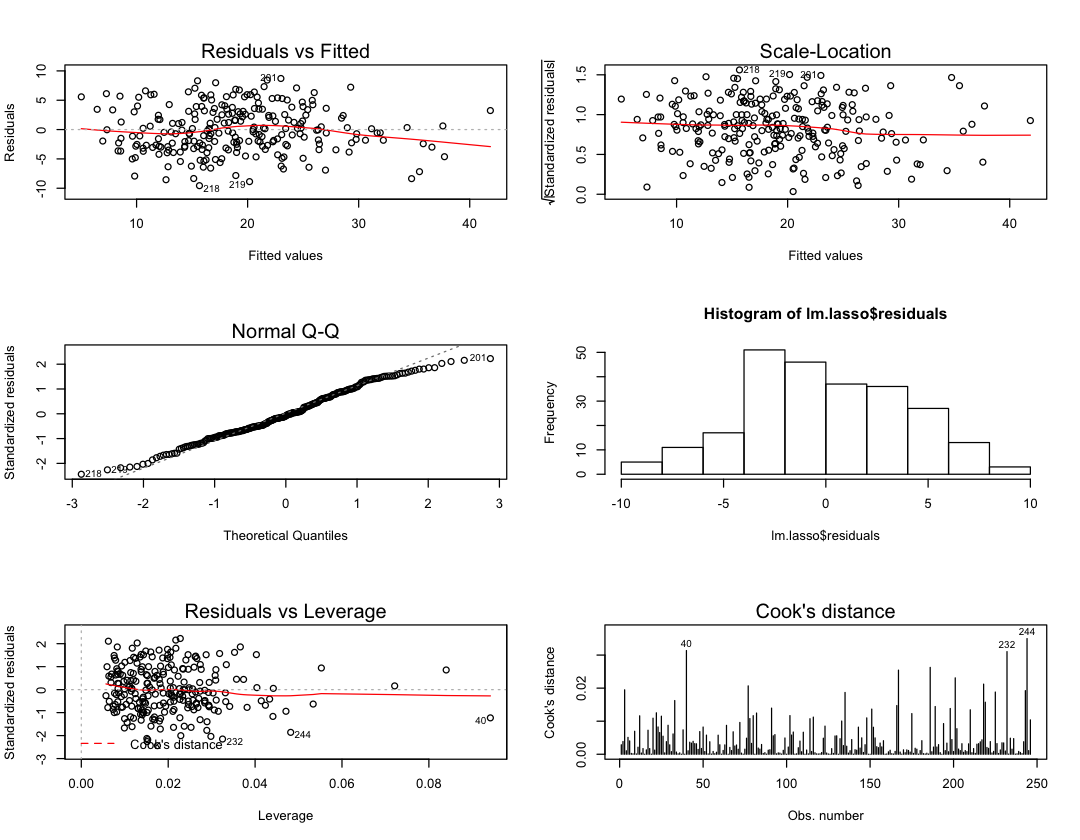

In [6]:
par(mfrow = c(3, 2)); options(repr.plot.width = 9, repr.plot.height = 7)
plot(lm.lasso, which = 1); plot(lm.lasso, which = 3); plot(lm.lasso, which = 2);
hist(lm.lasso$residuals); plot(lm.lasso, which = 5); plot(lm.lasso, which = 4)

**Linearity Assumption**    
The residuals vs fitted values plot shows no distinct patterns, which means there is no non-linear relation between predictors and outcomes. In another word, the simple linear model is approporiate.

**Independence Assumption**  
We carried out the Durbin-Watson test and the p-value of the test is greater than 0.05. As a result, we would not reject the null hypothesis that residuals are independent under the traditional level.

**Equal Variance Assumption**    
The Scale-Location plot also shows that the residuals appear spread randomly along the range of fitted values, which means residuals are homoscedastic.

**Normality Assumption**    
A histogram of the residuals is unimodal and symmetric. The QQ-plot of residuals presents a pattern of nearly straight line, so residuals also have standard normality. 

**Residuals vs Leverage**    
The Residuals vs Leverage plot indicates there is no influential case. We can barely see Cook’s distance lines (a red dashed line) because all cases are well inside of the Cook’s distance lines. 

### Discussion of Model
#### Strengths
- Linearity: Scatterplots of Bodyfat against each of the predictors are reasonably straight. And the The residuals appear to be randomly scattered and have no pattern with respect to the predicted values, which indicates that we capture the linearity and there is no non-linear relation between %bodyfat and predictors.
- Simplicity: The final model only has 4 predictors. To estimate body fat percentage of a man, we only need to access age, height, circumferences of abdomen and wrist. All of the measurements are easy to obtain.
- The final model conform to our experience, which will be further discussed in the conclusion.

#### Weakness
- Homoscedasticity: The scale-location plot shows that the variation of %bodyfat seems to be less when fitted values get larger.
- Normality: According to the qq-plot of residuals, it is suspected that the normal distribution is light-tailed.
- Precision: Our practical methods have a 3% to 4% error factor in the prediction of body fat.
- Restriction: Since the dataset is observed from American men, the conclusion will not be that accurate when it is used for women. The problem can be solved by scaling.
- There may be non-linear relationships between bodyfat and circumferences.

#### Possible rule of thumb
Your height times -0.3, plus abdomen circumference times 0.7, plus wrist circumference times -1.8, plus age times 0.05 and then add 4.

#### Example
For a man aged 30 with 73 inches height, 90 cm abdomen Cir. and 17 cm wrist Cir., his predicted body fat % percentage would be around 17.87%. With the rule of thumb, we get about 16% as the predicted body fat %.

### Conclusion
The estimated regression equation is simplified as:

$${\% Body\ Fat} =  4.05 -0.29*Height + 0.71*Abdomen -1.79*Wrist + 0.05*Age$$

The $R^2$ for the regression is 73%. Height, abdomen and forearm and wrist size together account for about 72.5% of the variation in %body fat among men. The regression equation indicates the underlying interpretation:
- The positive intercept of the regression model proves a simple fact: body fat will always exist.
- Each pound in height is associated with about a 0.3 decrease in %body fat among men.
- Each centimeter of abdomen is associated with a increase in %body fat of about 0.7 among men.
- Each centimeter of wrist is associated with a increase in %body fat of about 1.8 among men.
- The increase of age will in general lead to the decrease in %body fat of about 0.05. 

Len Kravit assumed a two-component model of body composition divides the body into a fat component and fat-free component. He also figured out for men, abdomen is classfied as a good measurement for bodyfat, while wrist is considered as a fat-free component. Increasing age can also lead to reduced metabolism and increased % body fat. Thus the signs of coefficients seem to be reasonable. Furthermore, it's hard to solve the multicollinearity between circumferences and height, therefore the negative effect of height on body fat is an outcome of confounding.

### Contribution
|    __Name__    | __Contribution__ |
| -------------: | :--------------- |
|   Yanqi Huang  | Completed the code and revised the summary.      |
|   Wenjin Li    | Compiled the notebook, improved the algorithm.       |
|   Xiawei Wang  | Prepared the slide and summrized our outputs and results.|

### Reference
1. Efron, Bradley, et al. "Least angle regression." The Annals of statistics 32.2 (2004): 407-499.
2. Johnson, Roger W. "Fitting percentage of body fat to simple body measurements." Journal of Statistics Education 4.1 (1996).
3. Aiken, Leona S., Stephen G. West, and Raymond R. Reno. Multiple regression: Testing and interpreting interactions. Sage, 1991.
4. Kravitz, Len, and Vivian H. Heyward. "Getting a grip on body composition." IDEA today 10 (1992): 34-41.